#REGRESIÓN LINEAL SIMPLE

In [ ]:
import pandas as pd

columna_x = [1, 2, 2, 3, 4, 4, 5, 6]
columna_y = [2, 3, 4, 4, 4, 6, 5, 7]

dicc_datos = {"x": columna_x, "y": columna_y}
df = pd.DataFrame(dicc_datos)
df

,x,y
0,1,2
1,2,3
2,2,4
3,3,4
4,4,4
5,4,6
6,5,5
7,6,7


In [ ]:
df['XY'] = df['x'] * df['y']
df['X^2'] = df['x'] **2
df

,x,y,XY,X^2
0,1,2,2,1
1,2,3,6,4
2,2,4,8,4
3,3,4,12,9
4,4,4,16,16
5,4,6,24,16
6,5,5,25,25
7,6,7,42,36


In [ ]:
#Calcular suma de cada columna
column_sums = df.sum()

#Crear nueva fila
fila_suma=pd.DataFrame([column_sums], index =['Suma'])
#Anadir fila a Df usando pd.concat
df_con_suma=pd.concat([df,fila_suma])
df_con_suma

,x,y,XY,X^2
0,1,2,2,1
1,2,3,6,4
2,2,4,8,4
3,3,4,12,9
4,4,4,16,16
5,4,6,24,16
6,5,5,25,25
7,6,7,42,36
Suma,27,35,135,111


In [ ]:
# Get the number of original rows (excluding the sum row)
n = len(df)

# Get the sums from the 'Sum' row in df_with_sums
sum_x = df_con_suma.loc['Suma', 'x']
sum_y = df_con_suma.loc['Suma', 'y']
sum_xy = df_con_suma.loc['Suma', 'XY']
sum_x2 = df_con_suma.loc['Suma', 'X^2']

# Perform the calculation based on the provided equation
numerator = (n * sum_xy) - (sum_x * sum_y)
denominator = (n * sum_x2) - (sum_x)**2

# Check if the denominator is zero to avoid division by zero error
if denominator == 0:
   m = "Denominator is zero, cannot perform the division."
else:
  m = numerator / denominator

# Display the result
print(f"El valor de m es: {m}")


El valor de m es: 0.8490566037735849


In [ ]:
promedio_y= sum_y/n
promedio_x= sum_x/n
b=promedio_y - m*promedio_x
print(f"El valor de b es: {b}")

El valor de b es: 1.5094339622641506


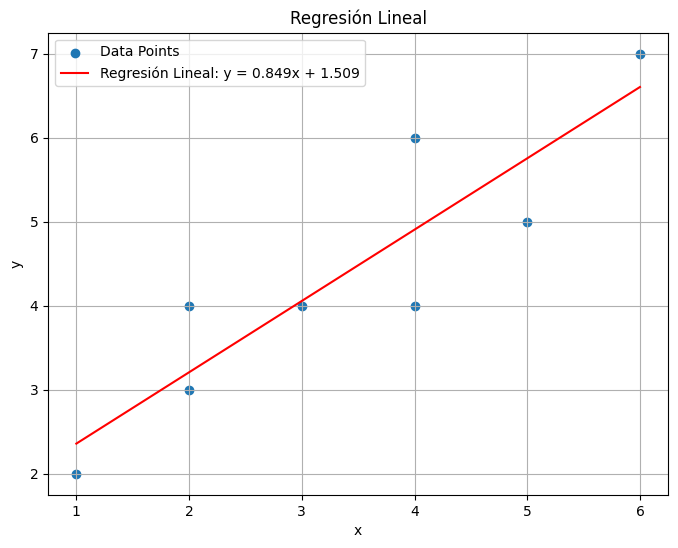

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create the plot
plt.figure(figsize=(8, 6))

# Plot the original data points
plt.scatter(df['x'], df['y'], label='Data Points')

# Generate points for the regression line
# Use the min and max values of x from the original data
x_line = np.array([df['x'].min(), df['x'].max()])
y_line = m * x_line + b

# Plot the regression line
plt.plot(x_line, y_line, color='red', label=f'Regresión Lineal: y = {m:.3f}x + {b:.3f}')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresión Lineal')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Calculate the predicted values of y
df['y_pred'] = m * df['x'] + b

# Calculate the residuals
residuals = df['y'] - df['y_pred']

# Calculate the sum of squared residuals
sum_of_squared_residuals = (residuals ** 2).sum()

print(f"La suma de cuadrados de residuos es: {sum_of_squared_residuals}")

La suma de cuadrados de residuos es: 3.5471698113207544


#REGRESIÓN MULTIPLE

https://rpubs.com/revite19/717614


In [ ]:
columna_y = [78.5, 74.3, 104.3, 87.6, 95.9, 109.2, 102.7, 72.5, 93.1, 115.9, 83.8, 113.3, 109.4]
columna_x1 = [7, 1, 11, 11, 7, 11, 3, 1, 2, 21, 1, 11, 10]
columna_x2 = [26, 29, 56, 31, 52, 55, 71, 31, 54, 47, 40, 66, 68]
columna_x3 = [6, 15, 8, 8, 6, 9, 17, 22, 18, 4, 23, 9, 8]
columna_x4 = [60, 52, 20, 47, 33, 22, 6, 44, 22, 26, 34, 12, 12]

dicc_datos = {"y": columna_y, "x1": columna_x1, "x2": columna_x2, "x3":columna_x3, "x4": columna_x4}
df1 = pd.DataFrame(dicc_datos)
df1

,y,x1,x2,x3,x4
0,78.5,7,26,6,60
1,74.3,1,29,15,52
2,104.3,11,56,8,20
3,87.6,11,31,8,47
4,95.9,7,52,6,33
5,109.2,11,55,9,22
6,102.7,3,71,17,6
7,72.5,1,31,22,44
8,93.1,2,54,18,22
9,115.9,21,47,4,26


In [ ]:
#Hacer copia de df1
df2 = df1.copy()

# Cambiar columna Y por 1
df2["y"] = 1

# Crear df con cambio en Y
df2 = df2[["y", "x1", "x2", "x3", "x4"]]
df2

,y,x1,x2,x3,x4
0,1,7,26,6,60
1,1,1,29,15,52
2,1,11,56,8,20
3,1,11,31,8,47
4,1,7,52,6,33
5,1,11,55,9,22
6,1,3,71,17,6
7,1,1,31,22,44
8,1,2,54,18,22
9,1,21,47,4,26


In [ ]:
import numpy as np
X=np.array(df2)
X


array([[ 1,  7, 26,  6, 60],
       [ 1,  1, 29, 15, 52],
       [ 1, 11, 56,  8, 20],
       [ 1, 11, 31,  8, 47],
       [ 1,  7, 52,  6, 33],
       [ 1, 11, 55,  9, 22],
       [ 1,  3, 71, 17,  6],
       [ 1,  1, 31, 22, 44],
       [ 1,  2, 54, 18, 22],
       [ 1, 21, 47,  4, 26],
       [ 1,  1, 40, 23, 34],
       [ 1, 11, 66,  9, 12],
       [ 1, 10, 68,  8, 12]])

In [ ]:
# Generate the transpose of matrix X
X_T = X.T

# Display the transpose matrix
print("Transpuesta de la matriz X:")
X_T

Transpuesta de la matriz X:


array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 7,  1, 11, 11,  7, 11,  3,  1,  2, 21,  1, 11, 10],
       [26, 29, 56, 31, 52, 55, 71, 31, 54, 47, 40, 66, 68],
       [ 6, 15,  8,  8,  6,  9, 17, 22, 18,  4, 23,  9,  8],
       [60, 52, 20, 47, 33, 22,  6, 44, 22, 26, 34, 12, 12]])

In [ ]:
# Multiply X_transpose by X
XT_X = X_T @ X    #@ es el operador de multiplicación matricial

# Display the resulting matrix
print("Resultado de la multiplicación de X_transpose por X:")
XT_X

Resultado de la multiplicación de X_transpose por X:


array([[   13,    97,   626,   153,   390],
       [   97,  1139,  4922,   769,  2620],
       [  626,  4922, 33050,  7201, 15739],
       [  153,   769,  7201,  2293,  4628],
       [  390,  2620, 15739,  4628, 15062]])

In [ ]:
# Generate the inverse of the XT_X matrix
try:
    XT_X_inverse = np.linalg.inv(XT_X)
    print("Matriz inversa de (X_transpose * X):")
    display(XT_X_inverse)
except np.linalg.LinAlgError:
    print("Error: La matriz (X_transpose * X) no es invertible.")

Matriz inversa de (X_transpose * X):


array([[ 8.20654575e+02, -8.44180186e+00, -8.45777985e+00,
        -8.63453878e+00, -8.28974378e+00],
       [-8.44180186e+00,  9.27104019e-02,  8.56862094e-02,
         9.26373566e-02,  8.44549553e-02],
       [-8.45777985e+00,  8.56862094e-02,  8.75602572e-02,
         8.78666397e-02,  8.55980995e-02],
       [-8.63453878e+00,  9.26373566e-02,  8.78666397e-02,
         9.52014097e-02,  8.63919188e-02],
       [-8.28974378e+00,  8.44549553e-02,  8.55980995e-02,
         8.63919188e-02,  8.40311912e-02]])

In [ ]:
# Extract the dependent variable vector y from df1
y = df1['y'].values.reshape(-1, 1)

# Multiply the transpose of X by the vector y
XT_y = X_T @ y

# Calculate the regression coefficients (beta)
beta = XT_X_inverse @ XT_y

# Display the regression coefficients
print("Coeficientes de regresión (beta):")
beta

Coeficientes de regresión (beta):


array([[62.4053693 ],
       [ 1.55110265],
       [ 0.51016758],
       [ 0.1019094 ],
       [-0.14406103]])

La línea de código `y = df1['y'].values.reshape(-1, 1)` realiza lo siguiente:

1.  `df1['y']`: Selecciona la columna llamada 'y' del DataFrame `df1`.
2.  `.values`: Convierte la columna seleccionada en un arreglo de NumPy.
3.  `.reshape(-1, 1)`: Remodela el arreglo de NumPy.
    *   `-1` en la primera dimensión le dice a NumPy que calcule automáticamente el número de filas necesario.
    *   `1` en la segunda dimensión asegura que el arreglo tenga una columna.

En resumen, esta línea toma la columna 'y' del DataFrame `df1` y la convierte en un arreglo de NumPy con una sola columna, lo cual es útil para operaciones de álgebra lineal donde se espera un vector columna.

In [ ]:
# Add columns to df1 for each beta coefficient
for i in range(len(beta)):
    df1[f'Beta_{i}'] = beta[i][0]

df1

,y,x1,x2,x3,x4,Beta_0,Beta_1,Beta_2,Beta_3,Beta_4
0,78.5,7,26,6,60,62.405369,1.551103,0.510168,0.101909,-0.144061
1,74.3,1,29,15,52,62.405369,1.551103,0.510168,0.101909,-0.144061
2,104.3,11,56,8,20,62.405369,1.551103,0.510168,0.101909,-0.144061
3,87.6,11,31,8,47,62.405369,1.551103,0.510168,0.101909,-0.144061
4,95.9,7,52,6,33,62.405369,1.551103,0.510168,0.101909,-0.144061
5,109.2,11,55,9,22,62.405369,1.551103,0.510168,0.101909,-0.144061
6,102.7,3,71,17,6,62.405369,1.551103,0.510168,0.101909,-0.144061
7,72.5,1,31,22,44,62.405369,1.551103,0.510168,0.101909,-0.144061
8,93.1,2,54,18,22,62.405369,1.551103,0.510168,0.101909,-0.144061
9,115.9,21,47,4,26,62.405369,1.551103,0.510168,0.101909,-0.144061


In [ ]:
# Calculate the predicted values of y using the multiple regression equation
df1['y_pred'] = df2 @ beta

df1

,y,x1,x2,x3,x4,Beta_0,Beta_1,Beta_2,Beta_3,Beta_4,y_pred
0,78.5,7,26,6,60,62.405369,1.551103,0.510168,0.101909,-0.144061,78.495240
1,74.3,1,29,15,52,62.405369,1.551103,0.510168,0.101909,-0.144061,72.788799
2,104.3,11,56,8,20,62.405369,1.551103,0.510168,0.101909,-0.144061,105.970938
3,87.6,11,31,8,47,62.405369,1.551103,0.510168,0.101909,-0.144061,89.327100
4,95.9,7,52,6,33,62.405369,1.551103,0.510168,0.101909,-0.144061,95.649244
5,109.2,11,55,9,22,62.405369,1.551103,0.510168,0.101909,-0.144061,105.274557
6,102.7,3,71,17,6,62.405369,1.551103,0.510168,0.101909,-0.144061,104.148669
7,72.5,1,31,22,44,62.405369,1.551103,0.510168,0.101909,-0.144061,75.674989
8,93.1,2,54,18,22,62.405369,1.551103,0.510168,0.101909,-0.144061,91.721651
9,115.9,21,47,4,26,62.405369,1.551103,0.510168,0.101909,-0.144061,115.618452


In [ ]:
# Calculate the residuals
df1['Error'] = df1['y'] - df1['y_pred']
df1

,y,x1,x2,x3,x4,Beta_0,Beta_1,Beta_2,Beta_3,Beta_4,y_pred,Error
0,78.5,7,26,6,60,62.405369,1.551103,0.510168,0.101909,-0.144061,78.495240,0.004760
1,74.3,1,29,15,52,62.405369,1.551103,0.510168,0.101909,-0.144061,72.788799,1.511201
2,104.3,11,56,8,20,62.405369,1.551103,0.510168,0.101909,-0.144061,105.970938,-1.670938
3,87.6,11,31,8,47,62.405369,1.551103,0.510168,0.101909,-0.144061,89.327100,-1.727100
4,95.9,7,52,6,33,62.405369,1.551103,0.510168,0.101909,-0.144061,95.649244,0.250756
5,109.2,11,55,9,22,62.405369,1.551103,0.510168,0.101909,-0.144061,105.274557,3.925443
6,102.7,3,71,17,6,62.405369,1.551103,0.510168,0.101909,-0.144061,104.148669,-1.448669
7,72.5,1,31,22,44,62.405369,1.551103,0.510168,0.101909,-0.144061,75.674989,-3.174989
8,93.1,2,54,18,22,62.405369,1.551103,0.510168,0.101909,-0.144061,91.721651,1.378349
9,115.9,21,47,4,26,62.405369,1.551103,0.510168,0.101909,-0.144061,115.618452,0.281548


In [ ]:
# Calculate the sum of squared residuals
df1['Error^2'] = df1['Error']**2
display(df1)

error_cuadratico_total = (df1['Error^2']).sum()
print(f"\nLa suma de residuos cuadrados para regresión multiple es: {error_cuadratico_total}")

,y,x1,x2,x3,x4,Beta_0,Beta_1,Beta_2,Beta_3,Beta_4,y_pred,Error,Error^2
0,78.5,7,26,6,60,62.405369,1.551103,0.510168,0.101909,-0.144061,78.495240,0.004760,0.000023
1,74.3,1,29,15,52,62.405369,1.551103,0.510168,0.101909,-0.144061,72.788799,1.511201,2.283728
2,104.3,11,56,8,20,62.405369,1.551103,0.510168,0.101909,-0.144061,105.970938,-1.670938,2.792032
3,87.6,11,31,8,47,62.405369,1.551103,0.510168,0.101909,-0.144061,89.327100,-1.727100,2.982875
4,95.9,7,52,6,33,62.405369,1.551103,0.510168,0.101909,-0.144061,95.649244,0.250756,0.062878
5,109.2,11,55,9,22,62.405369,1.551103,0.510168,0.101909,-0.144061,105.274557,3.925443,15.409100
6,102.7,3,71,17,6,62.405369,1.551103,0.510168,0.101909,-0.144061,104.148669,-1.448669,2.098642
7,72.5,1,31,22,44,62.405369,1.551103,0.510168,0.101909,-0.144061,75.674989,-3.174989,10.080552
8,93.1,2,54,18,22,62.405369,1.551103,0.510168,0.101909,-0.144061,91.721651,1.378349,1.899847
9,115.9,21,47,4,26,62.405369,1.551103,0.510168,0.101909,-0.144061,115.618452,0.281548,0.079269



La suma de residuos cuadrados para regresión multiple es: 47.863639350499


##Metricas de regresión

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np

In [ ]:
#Error cuadrático medio (MSE)
mse=mean_squared_error(df1['y'], df1['y_pred'])
print(f"El error cuadrático medio (MSE) es: {mse}")

#En promedio cuánto está alejado del valor real cuadraticamente

El error cuadrático medio (MSE) es: 3.681818411576846


In [ ]:
#RAÍZ DEL ERROR CUADRÁTICO MEDIO (RMSE)
rmse=np.sqrt(mse)
print(f"La raíz del error cuadrático medio (RMSE) es: {rmse}")

#Como estaría el MSE al cuadrado, no se puede comparar porque ejemplo pesos es simple, no elevado
#Se utiliza esta para comparar. Por cada predicción, se aleja 1.91. Eje 2-1.91 o 2+1.91

La raíz del error cuadrático medio (RMSE) es: 1.9188065070706963


In [ ]:
#ERROR ABSOLUTO MEDIO (MAE)
mae = mean_absolute_error(df1['y'], df1['y_pred'])    #y es a lo que quiero llegar. Promedio de las diferencias absolutas entre valores reales y predichos
print(f"El error absoluto medio (MAE) es: {mae}")

El error absoluto medio (MAE) es: 1.5870814560772486


In [ ]:
#MAPE: Error Porcentual Absoluto Medio
mape = mean_absolute_percentage_error(df1['y'], df1['y_pred']) * 100
print(f"El Error Porcentual Absoluto Medio (MAPE) es: {mape:.2f}%")

#Margen de error suelen ser de 5%, entonces se está trabajando bien

El Error Porcentual Absoluto Medio (MAPE) es: 1.72%


In [ ]:
#R2: Coeficiente de Determinación
R2=r2_score(df1['y'], df1['y_pred'])
print(f"El Coeficiente de Determinación (R2) es: {R2}")

El Coeficiente de Determinación (R2) es: 0.9823756204076801


###Histograma de errores

<Axes: >

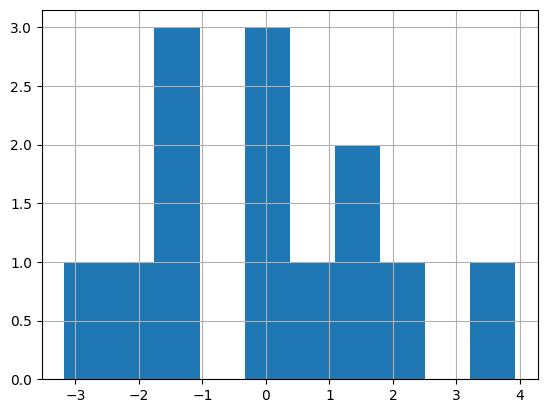

In [ ]:
df1['Error'].hist()

##EJERCICIO

In [ ]:
import pandas as pd

columna_x = [1, 2, 2, 3, 4, 4, 5, 6]
columna_y = [2, 3, 4, 4, 4, 6, 5, 7]

dicc_datos = {"x": columna_x, "y": columna_y}
df = pd.DataFrame(dicc_datos)
df

,x,y
0,1,2
1,2,3
2,2,4
3,3,4
4,4,4
5,4,6
6,5,5
7,6,7


In [ ]:
#Hacer copia de df
df1 = df.copy()

# Cambiar columna Y por 1
df1["y"] = 1

# Crear df con cambio en Y
df1 = df1[["y", "x"]]
df1

,y,x
0,1,1
1,1,2
2,1,2
3,1,3
4,1,4
5,1,4
6,1,5
7,1,6


In [ ]:
import numpy as np
X=np.array(df1)
X
# X.shape es para obetener las dimensiones de matriz o dataframe (filas, columnas)
#para verficiar que el arreglo tiene dimensión adecuada para multiplicación matricial

array([[1, 1],
       [1, 2],
       [1, 2],
       [1, 3],
       [1, 4],
       [1, 4],
       [1, 5],
       [1, 6]])

In [ ]:
# Generar la transpuesta de matriz X
X_T = X.T

print("Transpuesta de la matriz X:")
X_T

Transpuesta de la matriz X:


array([[1, 1, 1, 1, 1, 1, 1, 1],
       [1, 2, 2, 3, 4, 4, 5, 6]])

In [ ]:
# Multiplicar X_transpuesta por matriz X
XT_X = X_T @ X    #@ es el operador de multiplicación matricial

print("Resultado de la multiplicación de X_transpose por X:")
XT_X

Resultado de la multiplicación de X_transpose por X:


array([[  8,  27],
       [ 27, 111]])

In [ ]:
# Generar la inversa de matriz XT_X
XT_X_inverse = np.linalg.inv(XT_X)
print("Matriz inversa de (X_transpuesta * X):")
XT_X_inverse

Matriz inversa de (X_transpuesta * X):


array([[ 0.69811321, -0.16981132],
       [-0.16981132,  0.05031447]])

In [ ]:
# Extraer variable dependiente vector y de df
y = df['y'].values.reshape(-1, 1)

# Multiplicar transpuesta X por el vector y
XT_y = X_T @ y

# Calcular los coeficientes de regresión (beta)
beta = XT_X_inverse @ XT_y

# Display the regression coefficients
print("Coeficientes de regresión (beta):")
beta

Coeficientes de regresión (beta):


array([[1.50943396],
       [0.8490566 ]])

###Métricas (manual)

In [ ]:
df['ypred']=X@beta
df

,x,y,ypred
0,1,2,2.358491
1,2,3,3.207547
2,2,4,3.207547
3,3,4,4.056604
4,4,4,4.905660
5,4,6,4.905660
6,5,5,5.754717
7,6,7,6.603774


In [ ]:
#Error
df['y-ypred']= df['y']-df['ypred']
df

,x,y,ypred,y-ypred
0,1,2,2.358491,-0.358491
1,2,3,3.207547,-0.207547
2,2,4,3.207547,0.792453
3,3,4,4.056604,-0.056604
4,4,4,4.905660,-0.905660
5,4,6,4.905660,1.094340
6,5,5,5.754717,-0.754717
7,6,7,6.603774,0.396226


In [ ]:
df['error^2'] =df['y-ypred']**2
df

,x,y,ypred,y-ypred,error^2
0,1,2,2.358491,-0.358491,0.128515
1,2,3,3.207547,-0.207547,0.043076
2,2,4,3.207547,0.792453,0.627981
3,3,4,4.056604,-0.056604,0.003204
4,4,4,4.905660,-0.905660,0.820221
5,4,6,4.905660,1.094340,1.197579
6,5,5,5.754717,-0.754717,0.569598
7,6,7,6.603774,0.396226,0.156995


In [ ]:
error_cuadratico_total = df['error^2'].sum()
error_cuadratico_total

np.float64(3.547169811320754)

In [ ]:
#MSE error cuadrático medio
mse=error_cuadratico_total / len (df)
mse

np.float64(0.44339622641509424)

In [ ]:
rmse = mse**(1/2)
rmse

np.float64(0.6658800390574072)

In [ ]:
#Error absoluto total
error_abs_total= df['y-ypred'].abs().sum()
print(f"El error absoluto total es: {error_abs_total}")

El error absoluto total es: 4.566037735849058


In [ ]:
#MAE: Error absoluto medio
mae=error_abs_total/len(df)
print(f"El error absoluto medio (MAE) es: {mae}")

El error absoluto medio (MAE) es: 0.5707547169811322


In [ ]:
#MAPE: Error Porcentual Absoluto Medio
df['%error']=(df['y-ypred'].abs()/df['y']) *100
display(df)

mape = (df['%error'].sum()/len(df))
print(f"El error absoluto porcentual medio (MAPE) es: {mape:.2f}%")

,x,y,ypred,y-ypred,error^2,%error
0,1,2,2.358491,-0.358491,0.128515,17.924528
1,2,3,3.207547,-0.207547,0.043076,6.918239
2,2,4,3.207547,0.792453,0.627981,19.811321
3,3,4,4.056604,-0.056604,0.003204,1.415094
4,4,4,4.905660,-0.905660,0.820221,22.641509
5,4,6,4.905660,1.094340,1.197579,18.238994
6,5,5,5.754717,-0.754717,0.569598,15.094340
7,6,7,6.603774,0.396226,0.156995,5.660377


El error absoluto porcentual medio (MAPE) es: 13.46%


In [ ]:
#R2: Coeficiente de Determinación

#Suma total de cuadrados: suma de las diferencias al cuadrado entre los valores y_reales y la media_y
sst =((df['y'] - df['y'].mean()) ** 2).sum()

#Suma de cuadrados de residuos: suma de las diferencias al cuadrado entre los valores y_previstos y los valores y_reales (que es la suma del error^2)
ssr = df['error^2'].sum()

r2=1-(ssr/sst)
print(f"El Coeficiente de Determinación (R2) es: {r2}")

# mide que tan bien la predicción de regresión se aproxima a los puntos de datos reales
#Valores de R² más cercanos a 1 indican que el modelo se ajusta mejor a los datos,
# mientras que valores más cercanos a 0 sugieren un ajuste deficiente

El Coeficiente de Determinación (R2) es: 0.8015569336324053


###Histograma de errores

<Axes: >

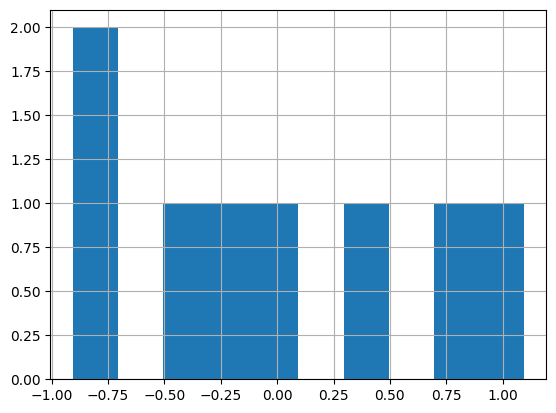

In [ ]:
df['y-ypred'].hist()

Histograma para saber si se están cometiendo muchos errores en las estimaciones
Datos alrededor de cero, no se equivoca mucho el modelo
Debería ser Gausiana

##EJERCICIO 2

In [ ]:
import pandas as pd
#Inversión en publicidad
columna_x = [5000, 5570, 4350, 7900, 6800, 5400, 6900, 3900, 4200, 5780]
#Ventas
columna_y = [160000, 189380, 139200, 260700, 217600, 183600, 234600, 136500, 138600, 202300]

dicc_datos = {"x": columna_x, "y": columna_y}
df = pd.DataFrame(dicc_datos)
df

,x,y
0,5000,160000
1,5570,189380
2,4350,139200
3,7900,260700
4,6800,217600
5,5400,183600
6,6900,234600
7,3900,136500
8,4200,138600
9,5780,202300


In [ ]:
#Hacer copia de df
df1 = df.copy()

# Cambiar columna Y por 1
df1["y"] = 1

# Crear df con cambio en Y
df1 = df1[["y", "x"]]
df1

,y,x
0,1,5000
1,1,5570
2,1,4350
3,1,7900
4,1,6800
5,1,5400
6,1,6900
7,1,3900
8,1,4200
9,1,5780


In [ ]:
import numpy as np
X=np.array(df1)
X

array([[   1, 5000],
       [   1, 5570],
       [   1, 4350],
       [   1, 7900],
       [   1, 6800],
       [   1, 5400],
       [   1, 6900],
       [   1, 3900],
       [   1, 4200],
       [   1, 5780]])

In [ ]:
# Generar la transpuesta de matriz X
X_T = X.T

print("Transpuesta de la matriz X:")
X_T

Transpuesta de la matriz X:


array([[   1,    1,    1,    1,    1,    1,    1,    1,    1,    1],
       [5000, 5570, 4350, 7900, 6800, 5400, 6900, 3900, 4200, 5780]])

In [ ]:
# Multiplicar X_transpuesta por matriz X
XT_X = X_T @ X    #@ es el operador de multiplicación matricial

print("Resultado de la multiplicación de X_transpuesta por X:")
XT_X

Resultado de la multiplicación de X_transpuesta por X:


array([[       10,     55800],
       [    55800, 326625800]])

In [ ]:
# Generar la inversa de matriz XT_X
XT_X_inverse = np.linalg.inv(XT_X)
print("Matriz inversa de (X_transpuesta * X):")
XT_X_inverse

Matriz inversa de (X_transpuesta * X):


array([[ 2.14015254e+00, -3.65618734e-04],
       [-3.65618734e-04,  6.55230707e-08]])

In [ ]:
# Extraer variable dependiente vector y de df
y = df['y'].values.reshape(-1, 1)

# Multiplicar transpuesta X por el vector y
XT_y = X_T @ y

# Calcular los coeficientes de regresión (beta)
beta = XT_X_inverse @ XT_y

# Display the regression coefficients
print("Coeficientes de regresión (beta):")
beta

#Como 'y' estaba a la izquierda, cambia cómo se muestran intercepto b y pendiente m

Coeficientes de regresión (beta):


array([[3116.08397437],
       [  32.81933979]])

Calculando la pseudo inversa de matriz X, es más rápido
Después de 'y' pasar a 1, se calcula beta= Xpinv @ y (original)

Xpinv= np.linalg.pinv(X)

https://chatgpt.com/share/68c0df00-15d8-800f-9b6b-61b0a212a247

https://colab.research.google.com/drive/1huptDg724TGXaTE-9hXr2teZYPTqZxDA?usp=sharing

https://www.google.com/search?q=pseudo+inversa+de+moore+penrose&oq=psuedo+inversa&gs_lcrp=EgZjaHJvbWUqCAgCEAAYFhgeMgYIABBFGDkyCQgBEAAYDRiABDIICAIQABgWGB4yCAgDEAAYFhgeMgoIBBAAGAoYFhgeMggIBRAAGBYYHjIICAYQABgWGB4yCAgHEAAYFhgeMggICBAAGBYYHjIICAkQABgWGB7SAQg5NzcwajBqN6gCALACAA&sourceid=chrome&ie=UTF-8


###Métricas (manual)

In [ ]:
df['ypred']=X@beta
df

,x,y,ypred
0,5000,160000,167212.782922
1,5570,189380,185919.806602
2,4350,139200,145880.212059
3,7900,260700,262388.868312
4,6800,217600,226287.594543
5,5400,183600,180340.518838
6,6900,234600,229569.528522
7,3900,136500,131111.509154
8,4200,138600,140957.311090
9,5780,202300,192811.867958


In [ ]:
#Error
df['y-ypred']= df['y']-df['ypred']
df

,x,y,ypred,y-ypred
0,5000,160000,167212.782922,-7212.782922
1,5570,189380,185919.806602,3460.193398
2,4350,139200,145880.212059,-6680.212059
3,7900,260700,262388.868312,-1688.868312
4,6800,217600,226287.594543,-8687.594543
5,5400,183600,180340.518838,3259.481162
6,6900,234600,229569.528522,5030.471478
7,3900,136500,131111.509154,5388.490846
8,4200,138600,140957.311090,-2357.311090
9,5780,202300,192811.867958,9488.132042


In [ ]:
df['error^2'] =df['y-ypred']**2
df

,x,y,ypred,y-ypred,error^2
0,5000,160000,167212.782922,-7212.782922,5.202424e+07
1,5570,189380,185919.806602,3460.193398,1.197294e+07
2,4350,139200,145880.212059,-6680.212059,4.462523e+07
3,7900,260700,262388.868312,-1688.868312,2.852276e+06
4,6800,217600,226287.594543,-8687.594543,7.547430e+07
5,5400,183600,180340.518838,3259.481162,1.062422e+07
6,6900,234600,229569.528522,5030.471478,2.530564e+07
7,3900,136500,131111.509154,5388.490846,2.903583e+07
8,4200,138600,140957.311090,-2357.311090,5.556916e+06
9,5780,202300,192811.867958,9488.132042,9.002465e+07


In [ ]:
error_cuadratico_total = df['error^2'].sum()
error_cuadratico_total

np.float64(347496243.66771954)

In [ ]:
#MSE error cuadrático medio
mse=error_cuadratico_total / len (df)
mse

np.float64(34749624.36677195)

In [ ]:
rmse = mse**(1/2)
rmse

np.float64(5894.881200395132)

In [ ]:
#Error absoluto total
error_abs_total= df['y-ypred'].abs().sum()
print(f"El error absoluto total es: {error_abs_total}")

El error absoluto total es: 53253.53785267798


In [ ]:
#MAE: Error absoluto medio
mae=error_abs_total/len(df)
print(f"El error absoluto medio (MAE) es: {mae}")

El error absoluto medio (MAE) es: 5325.353785267798


In [ ]:
#MAPE: Error Porcentual Absoluto Medio
df['%error']=(df['y-ypred'].abs()/df['y']) *100
display(df)

mape = (df['%error'].sum()/len(df))
print(f"El error absoluto porcentual medio (MAPE) es: {mape:.2f}%")

,x,y,ypred,y-ypred,error^2,%error
0,5000,160000,167212.782922,-7212.782922,5.202424e+07,4.507989
1,5570,189380,185919.806602,3460.193398,1.197294e+07,1.827117
2,4350,139200,145880.212059,-6680.212059,4.462523e+07,4.799003
3,7900,260700,262388.868312,-1688.868312,2.852276e+06,0.647821
4,6800,217600,226287.594543,-8687.594543,7.547430e+07,3.992461
5,5400,183600,180340.518838,3259.481162,1.062422e+07,1.775317
6,6900,234600,229569.528522,5030.471478,2.530564e+07,2.144276
7,3900,136500,131111.509154,5388.490846,2.903583e+07,3.947612
8,4200,138600,140957.311090,-2357.311090,5.556916e+06,1.700802
9,5780,202300,192811.867958,9488.132042,9.002465e+07,4.690130


El error absoluto porcentual medio (MAPE) es: 3.00%


In [ ]:
#R2: Coeficiente de Determinación

#Suma total de cuadrados: suma de las diferencias al cuadrado entre los valores y_reales y la media_y
sst =((df['y'] - df['y'].mean()) ** 2).sum()

#Suma de cuadrados de residuos: suma de las diferencias al cuadrado entre los valores y_previstos y los valores y_reales (que es la suma del error^2)
ssr = df['error^2'].sum()

r2=1-(ssr/sst)
print(f"El Coeficiente de Determinación (R2) es: {r2}")

# mide que tan bien la predicción de regresión se aproxima a los puntos de datos reales
#Valores de R² más cercanos a 1 indican que el modelo se ajusta mejor a los datos,
# mientras que valores más cercanos a 0 sugieren un ajuste deficiente

El Coeficiente de Determinación (R2) es: 0.9792985956899737


###Histograma de errores

<Axes: >

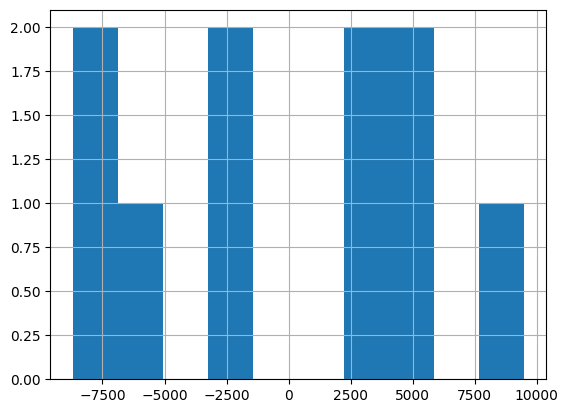

In [ ]:
df['y-ypred'].hist()